# Import Basic Librairy

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

#Exploration data

In [ ]:
conversion = pd.read_csv("conversion_data.csv")
conversion.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [ ]:
conversion.dtypes

In [ ]:
conversion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [ ]:
conversion.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,316200.0,30.569858,8.271802,17.0,24.0,30.0,36.0,123.0
new_user,316200.0,0.685465,0.464331,0.0,0.0,1.0,1.0,1.0
total_pages_visited,316200.0,4.872966,3.341104,1.0,2.0,4.0,7.0,29.0
converted,316200.0,0.032258,0.176685,0.0,0.0,0.0,0.0,1.0


In [ ]:
conversion.shape

(316200, 6)

In [ ]:
conversion.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [99]:
conversion.converted.value_counts()/len(conversion)

0    0.967742
1    0.032258
Name: converted, dtype: float64

# Visualisation

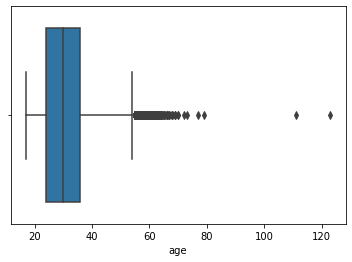

In [ ]:
sns.boxplot(conversion.age)
plt.show()

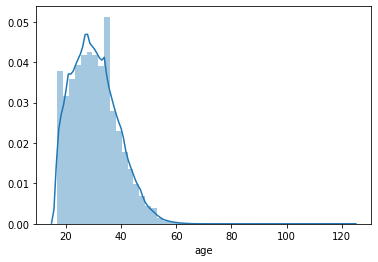

In [ ]:
sns.distplot(conversion.age)
plt.show()

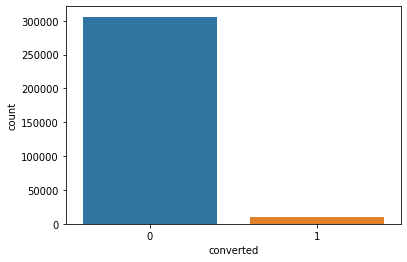

In [ ]:
sns.countplot(conversion.converted)
plt.show()

In [ ]:
conversion["country"].sort_values()

217850    China
53181     China
228851    China
53179     China
53178     China
          ...  
188428       US
188429       US
188430       US
188432       US
158099       US
Name: country, Length: 316200, dtype: object

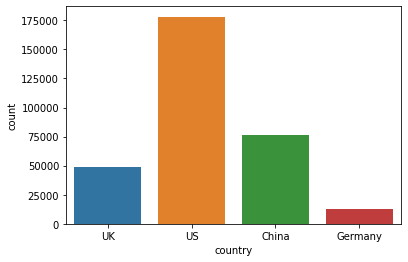

In [ ]:
sns.countplot(conversion.country)
plt.show()

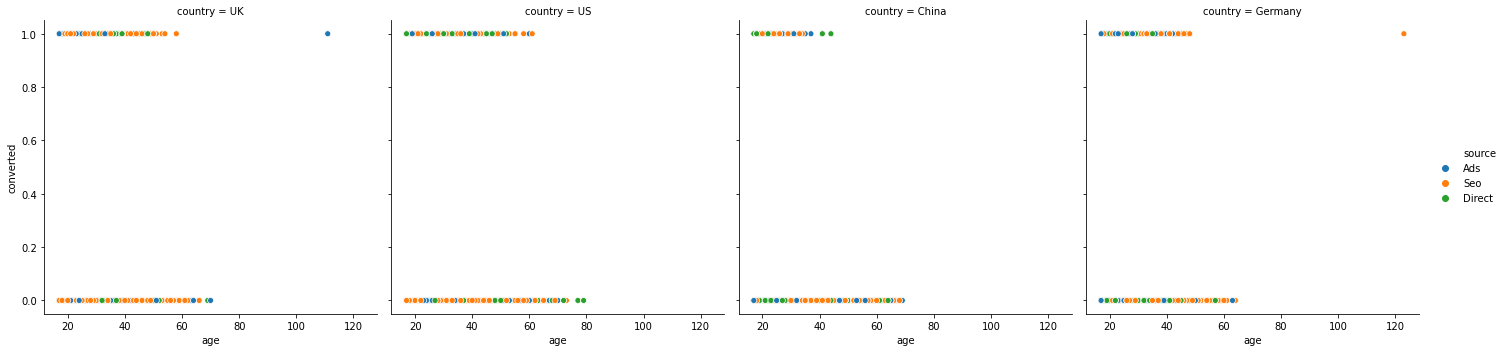

In [ ]:
sns.relplot(x="age", y="converted",data=conversion, col="country",hue="source")
plt.show()

In [ ]:
conversion.head()

In [ ]:
#sns.lmplot(x="total_pages_visited", y="converted",data=conversion,logistic=True)

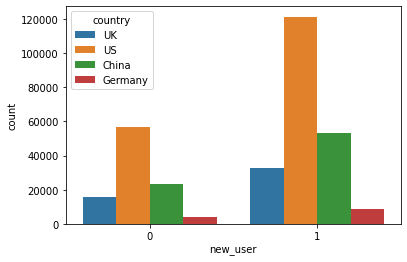

In [ ]:
sns.countplot(x="new_user",hue="country", data=conversion)
plt.show()

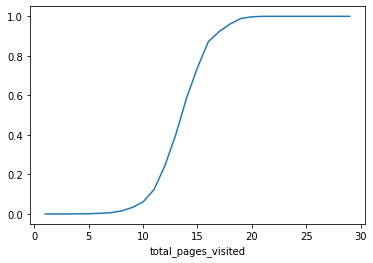

In [ ]:
conversion.groupby(['total_pages_visited'])['converted'].mean().plot()
plt.show()

In [ ]:
import altair as alt
alt.data_transformers.enable('default', max_rows=None)

In [ ]:
alt.Chart(conversion).mark_point().encode(
    x='new_user',
    y='age',
    color='country',
).interactive()

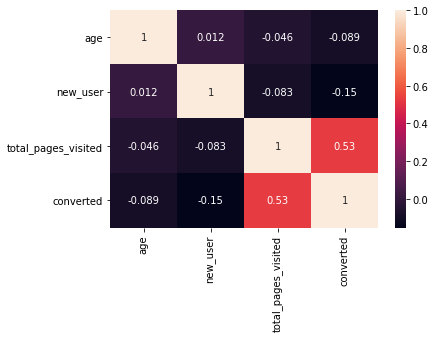

In [ ]:
corr = conversion.corr()
sns.heatmap(corr,annot=True)

# Machine Learning Model

## Preparation for ML

In [ ]:
conversion.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [ ]:
#conversion.age.value_counts()

In [ ]:
#conversion.total_pages_visited.value_counts().plot(kind="bar")

In [ ]:
conversion.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [ ]:
X = conversion.iloc[:,:-1]
X.head()

,country,age,new_user,source,total_pages_visited
0,UK,25,1,Ads,1
1,US,23,1,Seo,5
2,US,28,1,Seo,4
3,China,39,1,Seo,5
4,US,30,1,Seo,6


In [ ]:
Y = conversion.loc[:, conversion.columns=="converted"]
Y.head()

,converted
0,0
1,0
2,0
3,0
4,0


In [ ]:
X = pd.get_dummies(X,drop_first=True)
X.head()

,age,new_user,total_pages_visited,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,25,1,1,0,1,0,0,0
1,23,1,5,0,0,1,0,1
2,28,1,4,0,0,1,0,1
3,39,1,5,0,0,0,0,1
4,30,1,6,0,0,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=2,stratify=Y,shuffle=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

## Model

Notre problématique releve de la classification binaire car notre modéle devra predire si un utilisateur va acheter (1) ou pas (0). Le modele de machine learning correspond est une regression logistique

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Calcule du coefficient

In [ ]:
lr_coef = lr.coef_
lr_coef

array([[-0.59290304, -0.79542042,  2.53409705,  0.7264012 ,  1.26067203,
         1.56271265, -0.09083817, -0.012778  ]])

Calcule du score sur le train et le test

In [ ]:
lr.score(X_train, Y_train)

0.9860531309297913

In [ ]:
lr.score(X_test, Y_test)

0.9864748049757538

Notre modele a 98,64% de bonnes prédictions. A premiere vue, on a un tres bon modele néanmoins, ceci est à relativiser car on est en présence d'un dataset déséquilibré avec une forte proportion des clients n'ayant pas acheté (converted==0)

Calcule de la cross_val moyenne pour évaluer le score 

In [ ]:
#Cross validation pour évaluer le score

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state = 7)

cvs = cross_val_score(lr,X_test,Y_test, cv=kf) 
#cvs.mean()
print("Le score après cross validation est {}".format(cvs.mean()))

Le score après cross validation est 0.9864853468269027


La cross validation confirme la bonne performance de notre modèle. 

Calcule des prédictions du modèle pour l’echantillon d’apprentissage et l’échantillon test

In [ ]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
y_pred_test = lr.predict(X_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
baseline_pred = [1]*len(Y_test)
np.array(baseline_pred)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_pred_proba=lr.predict_proba(X_test)
y_pred_proba

array([[6.79947828e-01, 3.20052172e-01],
       [9.99557480e-01, 4.42520244e-04],
       [9.34898442e-01, 6.51015582e-02],
       ...,
       [9.67136365e-01, 3.28636353e-02],
       [9.99172103e-01, 8.27897304e-04],
       [9.82679465e-01, 1.73205354e-02]])

## Evaluate Model 

Metric 1 : Construction d'une matrice de confusion pour évaluer les prédictions du modèle selon les 2 catégories

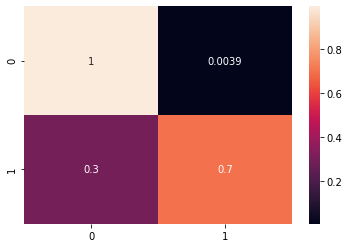

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_test,normalize="true")
sns.heatmap(cm,annot=True)
plt.show()

Comme on peut le voir à travers la matrice de confusion, notre modèle predit parfaitement les 0 donc les clients n'ayant pas acheté et moins bien les clients qui vont convertir leur visite en achat.

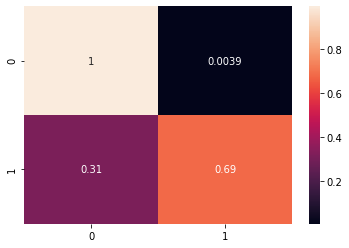

In [75]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_train, y_pred_train,normalize="true")
sns.heatmap(cm,annot=True)
plt.show()

Metric 2: Classification report

In [ ]:
from sklearn.metrics import classification_report
cl = classification_report(Y_test, y_pred_test)
print(cl)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     91800
           1       0.86      0.70      0.77      3060

    accuracy                           0.99     94860
   macro avg       0.92      0.85      0.88     94860
weighted avg       0.99      0.99      0.99     94860



Metric 3 : Courbe ROC

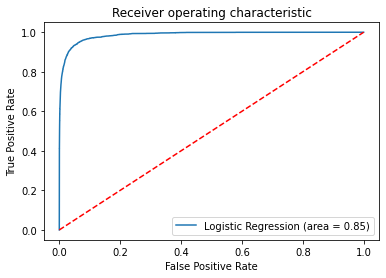

In [80]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, lr.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1]) 

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Notre score AUC (0.85) etant proche de 1, on peut estimer que notre modele performe bien. 

In [84]:
from sklearn.feature_selection import chi2
feature_important = chi2(X,Y)
feature_important

(array([5.58042574e+03, 2.30914908e+03, 2.02697509e+05, 3.82500000e+02,
        6.44210526e+02, 1.75257732e+02, 3.87887324e+01, 2.01315789e+00]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 3.55366590e-085,
        4.05710472e-142, 5.25926285e-040, 4.72245974e-010, 1.55940432e-001]))

In [96]:
pd.DataFrame(data=feature_important, columns=X.columns,index=["Chi2 Score", "P-value"]).transpose().sort_values("Chi2 Score", ascending = False)

,Chi2 Score,P-value
total_pages_visited,202697.509485,0.000000e+00
age,5580.425744,0.000000e+00
new_user,2309.149077,0.000000e+00
country_UK,644.210526,4.057105e-142
country_Germany,382.500000,3.553666e-85
country_US,175.257732,5.259263e-40
source_Direct,38.788732,4.722460e-10
source_Seo,2.013158,1.559404e-01


Le dataframe ci dessus présente les feature important selon le modele. En top 3, nous avons l'âge : le nombre de page visited, l'âge, les nouveaux utilisateurs. 